<h1 align="center">Actividad 1: Agrupar datos con algoritmos de Clustering en Python</h1>

<div style="border: 2px solid #1c75c8; background-color: #c5ddf6;">
<h2> Preámbulo</h2>
<p> Esta activad se inspira de ejercicios disponibles en los recursos siguientes:<p>
<ul>
<li> Guías y código Python de <a href="http://brandonrose.org/">Brandon Rose</li>
<li>Curso de <a href="https://www.datacamp.com/courses/unsupervised-learning-in-python">DataCamp</a> y código disponible en la cuenta GitHub de <a href="https://github.com/benjaminwilson/python-clustering-exercises">Benjamin Wilson</a></li>
</ul>
<p> La actividad requiere el uso de Python 3.x y <a href="http://jupyter.org/install">Jupyter Notebook</a>. El código entregado fue probado con Python 3.6.1. Para saber cuál versión de Python usted está utilizando, ejecutar la celda siguiente (está información es importante cuando se necesitará instalar nuevos paquetes.</p>
</div>

In [3]:
!python3 -V

Python 3.5.3


<div style="border: 2px solid #D24747; background-color:#F8B4B4">
<h2>Objetivos de la actividad</h2>
<p>El <b>objetivo general</b> de esta actividad consiste en saber explorar la estructura oculta de un dataset, implementando una metodología de agrupamiento de datos clásico, utilizando unos algoritmos de clustering estándares (K-means, Ward clustering, DBSCAN) sobre datos estructurados y no estructurados y describiendo sus principales características.</p>  

<p> Un <i>objetivo secundario</i> consiste en programar con algunas librerías Python para analizar y visualizar datos (<a href="https://pandas.pydata.org/">Pandas</a>, Sci-Kit learn, Matplotlib, etc.)</p>
</div>

<h2>0. Antes de empezar: unas palabras sobre las herramientas de Python para la Ciencia de los Datos...</h2>

<img src="python-packages.png" alt="python-packages"></img>

<p>Cada toolkit de Python tiene sus propios objetivos:</p>
<ul>
     <li><b>Numpy</b> agrega funcionalidades en Python para soportar arreglos y matrices de gran tamaño y funciones matemáticas para manipularlas.</li>
     <li><b>SciPy</b> es una colección de algoritmos matemáticos y funciones programadas con NumPy. Agrega funciones y clases de alto nivel para facilitar la manipulación y visualización de datos.</li>
      <li><b>Pandas</b> ofrece estructuras de datos y operaciones para manipular y analizar matrices de datos numéricos y series de tiempo.</li>
    <li><b>Scikit-learn</b> es una librería Python para el Machine Learning, contiene una implementación de los principales algoritmos estandares para el aprendizaje supervisado y no supervisado.</li>
</ul>

<p> En la versión actual de Scikit-lean, se puede encontrar en particular los algoritmos de clustering siguiente:</p>
<img src="clustering-algorithm.png" alt="clustering-algorithm."></img>


<h2>1. Ejercicio 1: descubrir K-means sobre datos estructurados bi-dimensionales</h2>

<p>El primer dataset que queremos explorar consiste en un archivo CSV donde se encuentra un conjunto 300 observaciones (o instancias) descritas por 2 características numéricas. 
<br>Ejemplo:<i>1.70993371252,0.698852527208</i></p>
<ul><li>La primera etapa consiste en cargar los datos en un objeto <i>DataFrame</i>. Un DataFrame es una de las estructuras de datos provistas por Pandas para representar los datos, consiste en una matriz en dos dimensiones (ver <a href="https://pandas.pydata.org/pandas-docs/stable/dsintro.html">más detalles</a>) donde cada fila es un dato y cada columna una característica sobre los datos.</li></ul>

In [2]:
import pandas as pd
dataframe = pd.read_csv('datasets/dataset1.csv')
dataframe

,0,1
0,0.065446,-0.768664
1,-1.529015,-0.429531
2,1.709934,0.698853
3,1.167791,1.012626
4,-1.801101,-0.318613
5,-1.635679,-0.028595
6,1.219904,0.746435
7,-0.261752,-0.624929
8,-1.619258,-0.479839
9,-1.843296,-0.166944


<ul><li>Para tener una primera comprensión de nuestros datos, queremos visualizarlos en un <i><a href="https://en.wikipedia.org/wiki/Scatter_plot">Scatter plot</a></i>, a través la librería Matplotlib:</li></ul>

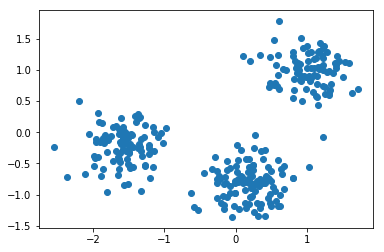

In [4]:
import matplotlib.pyplot as plt

#Crear un arreglo 'coordinates_x' que contiene los valores de la columna 0 de nuestro dataframe
coordinates_x = dataframe.values[:,0]
#lo mismo con los valores de la columna 1 del dataframe
coordinates_y = dataframe.values[:,1]

#Crear y mostrar el scatter plot pasando las coordinadas como parametros de la función plt.scatter().
plt.scatter(coordinates_x, coordinates_y)
plt.show()

<p> Como pueden verlo, nuestro dataset tiene una estructura bastante simple y explicita, aparecen 3 grupos de datos (o <i>clústers</i>). Sin embargo, este caso es particularmente simple ya que los datos tienen solamente 2 dimensiones y que los clústers están bien separados.

El algoritmo K-means (o algoritmo de Lloyd) es un método de agrupamiento, que tiene como objetivo la partición de un conjunto de n observaciones en k grupos en el que cada observación pertenece al grupo cuyo valor medio es más cercano. El problema es computacionalmente difícil (NP-hard). Sin embargo, hay eficientes heurísticas que se emplean comúnmente y convergen rápidamente a un óptimo local (ver <a href="https://en.wikipedia.org/wiki/K-means_clustering">más detalles</a>).
<ul><li>La librería SciKit-learn de Python ofrece una implementación de este algoritmo, que se puede utilizar con la API siguiente:</li></ul>

In [5]:
from sklearn.cluster import KMeans
#Declaración de un modelo de clustering especificando el número a priori de clusters que queremos encontrar. 
##En este caso, hemos elegido por casualidad n_clusters=5.
modelKmeans = KMeans(n_clusters=5)
#Entrenamiento del modelo de clustering con los datos de nuestro dataframe
modelKmeans.fit(dataframe.values)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

<div style="border: 1px solid #000000; padding: 5px;">
<b>Preguntas:</b>
<ol>
    <li> ¿Cuáles son las etapas del algoritmo de Lloyd?</li>
<li> ¿Por qué es necesario initializar varias veces el algoritmo? De qué sirve el parametro n_init?</li>
<li> ¿Cómo elegir el número de inicializaciones e iteraciones? (n_init y max_iter)</li>
</ol>
<p><b>Respuestas:</b></p>
    <p><b> ¿Cuáles son las etapas del algoritmo de Lloyd?</b><br>
R: El algoritmo de Lloyd busca conjuntos de puntos igualmente espaciados y particiones de estos subconjuntos, encontrando, repetidamente, el centroide de cada conjunto en cada partición y, luego, volviendo a particionar la entrada de acuerdo con cuál de estos centroides es el más cercano.<br>
Los pasos:<br>
1. Ubicación inicial aleatoria de un número k de grupos de puntos (k centroides) en el dominio de entrada.<br>
2. Se construye una nueva partición, asociando cada elemento con el centroide más cercano.<br>
3. Se recalculan los centroides.<br>
Se itera hasta que los centroides se estabilicen o converjan.</p>

<p><b> ¿Por qué es necesario inicializar varias veces el algoritmo? ¿De qué sirve el parametro n_init?</b><br>
R: Debido a que, a pesar de que es un algoritmo rápido, tiene la falencia de caer en mínimos locales, por lo que es de utilidad reiniciarlo varias veces (y quedarse con el mejor resultado).<br>
De sklearn: "n_init es el número de veces que el algoritmo se ejecutará con diferentes semillas para los centroides. Los resultados finales serán la mejor salida de n_init ejecuciones consecutivas, en términos de inercia".</p>

<p><b> ¿Cómo elegir el número de inicializaciones e iteraciones? (n_init y max_iter)</b><br>
R: La cantidad de inicializaciones y de iteraciones puede determinarse experimentalmente y depende de la naturaleza de los datos de entrada.</p>

</div>

<ul>
<li>Ahora queremos visualizar cómo el algoritmo agrupó los datos en 5 grupos:
</ul>


[0 2 4 4 2 2 4 0 2 2 4 3 2 1 2 0 1 4 0 1 2 0 2 3 3 2 3 0 3 2 4 4 4 2 0 2 3
 0 2 0 0 4 2 2 2 0 3 4 0 1 4 1 0 0 3 2 3 3 2 1 2 3 3 1 1 2 1 2 2 3 1 2 4 3
 1 2 0 3 3 4 3 2 1 2 2 2 2 0 3 4 2 1 2 0 0 3 4 2 2 1 2 0 2 1 0 1 4 4 2 2 0
 2 4 2 2 2 3 2 1 4 0 0 3 0 0 2 4 3 2 2 1 4 2 3 2 3 1 2 4 3 1 1 0 4 4 3 1 2
 3 3 3 4 1 2 4 2 0 0 4 2 4 1 1 2 3 0 2 4 4 3 3 4 3 3 2 3 4 1 4 3 0 4 3 4 4
 3 2 4 0 0 3 0 2 1 3 2 2 2 0 2 3 0 2 1 1 3 1 3 3 2 2 3 4 2 4 3 4 2 3 2 2 2
 2 4 4 1 3 3 2 3 4 2 3 3 2 0 4 4 4 1 1 2 0 3 1 1 0 2 4 2 2 3 3 2 2 2 0 1 3
 2 3 4 1 4 4 4 0 0 2 0 3 2 4 4 2 0 1 4 2 2 3 3 0 2 2 3 4 2 2 1 0 3 3 2 0 3
 0 2 2 2]


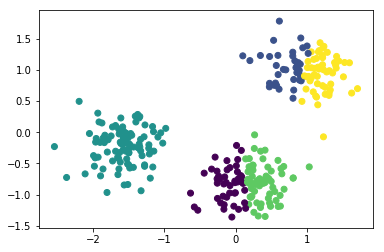

In [7]:
#Crear un arreglo de datos donde cada valor corresponde a la decision del modelo K-Means a la pregunta siguiente:
#¿A qué clúster pertenece el dato corriente de la dataframe?
labels = modelKmeans.predict(dataframe.values)
print(labels)

#Crear un Scatter Plot donde cada punto tiene un color asociado a un grupo
plt.scatter(dataframe.values[:,0], dataframe.values[:,1], c=labels)
plt.show()

<ul><li>Se puede utilizar el mismo modelo para clasificar nuevos datos. NB: Sin embargo, si el objetivo aplicativo consiste en clasificar datos según ciertas categorías es recomendable seguir una metodología de aprendizaje supervisado.</li></ul>

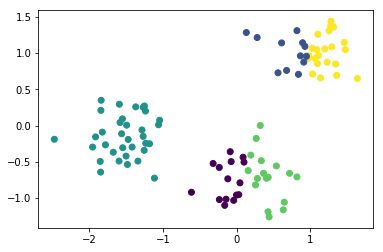

In [8]:
#Cargar un dataset con nuevos datos
dataframe2 = pd.read_csv('datasets/dataset2.csv')

#Utilizar el modelo K-Means anterior para clasificar los nuevos datos
labels2 = modelKmeans.predict(dataframe2.values)

#Visualizar el resultado de la predicción en un Scatter Plot
plt.scatter(dataframe2.values[:,0], dataframe2.values[:,1], c=labels2)
plt.show()

<div style="border: 1px solid #000000; padding: 5px;">
<b>Preguntas:</b>
<ol>
<li> ¿Cómo el algoritmo de Lloyd/K-means permitió predecir la clase de los nuevos datos?</li>
<li> ¿Cómo se podría definir el concepto de <i>'centroid'</i>?</li>
<li> ¿Cuáles son los limites del método que utiliza K-means para calcular los <i>'centroid'</i>?</li>
</ol>


<p><b>Respuestas:</b></p>
    <p><b> ¿Cómo el algoritmo de Lloyd/K-means permitió predecir la clase de los nuevos datos?</b><br>
R: Utilizando los centroides previamente calculados, y las distancias a esos centroides. </p>

<p><b> ¿Cómo se podría definir el concepto de <i>'centroid'</i>?</b><br>
R: El centroide puede entenderse como el punto medio o centro de gravedad de cada conjunto. La "media" de los datos que tiene asignados.</p>

<p><b> ¿Cuáles son los limites del método que utiliza K-means para calcular los <i>'centroid'</i>?</b><br>
R: Los centroides deben estar suficientemente separados entre sí, evitando que todos los datos estén a distancias similares de todos los centroides.</p>

</div>

<ul><li>Visualizemos los <i>centroids</i> de cada clúster:</li></ul>

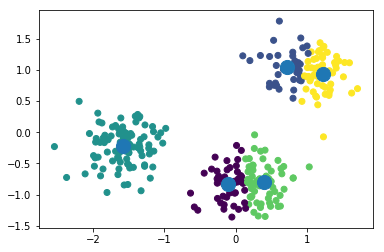

In [9]:
#en el API del modelo k-means existe un metodo permitiendo de obtener un arreglo de datos correspondiendo a los centroids 
centroids = modelKmeans.cluster_centers_

#Dibujamos el Scatter Plot de la dataframe inicial ...
plt.scatter(dataframe.values[:,0], dataframe.values[:,1], c=labels)
#...y agregamos los centroids en el mismo plot
plt.scatter(centroids[:,0], centroids[:,1], marker='o', s=200)
plt.show()

<ul><li>La distancia con el centroid permite clasificar los nuevos datos:</li></ul>

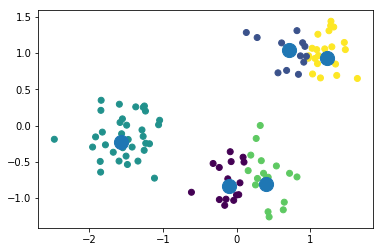

In [10]:
#nuevos datos de la dataframe2
plt.scatter(dataframe2.values[:,0], dataframe2.values[:,1], c=labels2)
#mismos centroids
plt.scatter(centroids[:,0], centroids[:,1], marker='o', s=200)
plt.show()

<div style="border: 1px solid #000000; padding: 5px;">
<b>Preguntas:</b>
<ol>
<li> ¿Existe un número de clúster mejor que los otros para buscar la estructura oculta de los datos?</li>
<li> ¿Cómo determinar cuál es el mejor número de clúster?</li>
</ol>

<p><b>Respuestas:</b></p>
    <p><b> ¿Existe un número de clúster mejor que los otros para buscar la estructura oculta de los datos?</b><br>
R: A priori, no. Dependerá de la naturaleza de los datos y, sobre todo, del problema en solución. De todas formas se opta por un óptimo (ver pregunta 2, abajo).</p>

<p><b> ¿Cómo determinar cuál es el mejor número de clúster?</b><br>
R: El número óptimo de clusters es, de cierta forma, subjetivo y depende del método utilizado para medir similitudes y de los parámetros utilizados para generar las particiones.<br>
Existen métodos directos (optimizar un criterio) como elbow y silhouette; y métodos de prueba estadística (comparar evidencia contra hipótesis nula) como la "estadística de brecha" o gap statistic.</p>

</div>

<p>Existen varios métodos estadísticos para determinar el mejor número de clústers tales como los métodos <i>Elbow</i>, <i>Average Silhouette</i> y <i>Gap Statistics</i> (ver <a href="http://www.sthda.com/english/wiki/print.php?id=239#three-popular-methods-for-determining-the-optimal-number-of-clusters">detalles</a>). En la API de la librería SciKit-Learn también existe un método llamado <i>inertia</i> que permite estimar el mejor número k:</p>

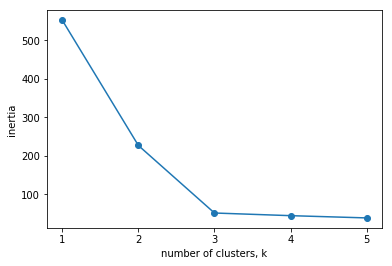

In [11]:
from sklearn.cluster import KMeans

num_k = range(1, 6)
inertias = []

for k in num_k:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)

    # Fit model to samples
    model.fit(dataframe)

    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)

    import matplotlib.pyplot as plt

# Plot ks vs inertias
plt.plot(num_k, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(num_k)
plt.show()


<div style="border: 1px solid #000000; padding: 5px;">
<b>Preguntas:</b>
<ol>
<li> ¿A qué método para buscar el mejor número de clústers corresponde el método <i>inertia</i> de Sci-Kit?</li>
<li> ¿Cuáles son las principales <b>ventajas</b> del algoritmo K-means?</li>
<li> ¿Cuáles son las principales <b>limites</b> del algoritmo K-means?</li>
</ol>

<p><b>Respuestas:</b></p>
    <p><b> ¿A qué método para buscar el mejor número de clústers corresponde el método <i>inertia</i> de Sci-Kit?</b><br>
R: Corresponde al método Elbow, ya que selecciona el centroide que minimiza la inercia (la suma de las distancias cuadradas al centroide más cercano).</p>

<p><b> ¿Cuáles son las principales <b>ventajas</b> del algoritmo K-means?</b><br>
R: - Es un algoritmo "rápido" (es lineal en el número de datos, es decir, O(n) ).<br>
- Utilizable en  grandes volúmenes de datos.</p>

<p><b> ¿Cuáles son las principales <b>limites</b> del algoritmo K-means?</b><br>
R: - Funciona bien cuando la forma de los clusters es hiper esférica (o circular en 2 dimensiones). Si los clusters "naturales" del conjunto de datos no son esféricos, K-means puede no ser buena opción.<br>
- Comienza con una selección aleatoria de los centroides, por que puede producir diferentes resultados en diferentes ejecuciones. Esto hace que los resultados puedan ser no repetibles ni consistentes entre ejecuciones.</p>
</div>

<h2>2. Ejercicio 2: Descubrir los algoritmos de clustering jerárquico sobre datos estructurados multi-dimensionales</h2>

<div>
<div style="float:left;width:45%;" >
    <p>En este segundo ejercicio, queremos explorar otra familia de algoritmos de clustering basada sobre la idea que en ciertos casos los datos pueden tener <b>relaciones jerarquícas</b> ocultas. El Algoritmo de Ward es parte de este grupo de algoritmos.</p>

<p> Supongamos que trabajamos por una empresa de ingeniería genética que quiere entender las evoluciones en las especies de semillas de grano. Tenemos a nuestra disposición el dataset 'semillas-trigo.csv'.</p>
</div>

<div style="float:right;width:45%;">
    <img src="images/trigo.jpeg" alt="trigo">
</div>
<div style="clear:both; font-size:1px;"></div>
</div>

<ul>
<li>Cargar los datos en un DataFrame:</li>
</ul>

In [12]:
import pandas as pd

seeds_df = pd.read_csv('datasets/semillas-trigo.csv')

# Suprimir la columna 'grain_variety' del dataset. Utilizaremos esta información solamente como referencia al final
varieties = list(seeds_df.pop('grain_variety'))

# Extraer los datos como un arreglo NumPy
samples = seeds_df.values

# Mostrar el DataFrame
seeds_df

,area,perimeter,compactness,length,width,asymmetry_coefficient,groove_length
0,15.26,14.84,0.8710,5.763,3.312,2.2210,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.0180,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.6990,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.2590,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.3550,5.175
5,14.38,14.21,0.8951,5.386,3.312,2.4620,4.956
6,14.69,14.49,0.8799,5.563,3.259,3.5860,5.219
7,14.11,14.10,0.8911,5.420,3.302,2.7000,5.000
8,16.63,15.46,0.8747,6.053,3.465,2.0400,5.877
9,16.44,15.25,0.8880,5.884,3.505,1.9690,5.533


<p>En SciPy, el método <i>linkage()</i> permite hacer clustering jerárquico o aglomerativo. Ver más detalles: <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html#scipy.cluster.hierarchy.linkage">linkage()</a> </p>

<p> El clustering jerárquico consiste en calcular una distancia entre clusters. Los métodos más simples consisten en calcular una distancia entre 2 puntos referencias de cada clúster:  Nearest Point Algorithm (o 'single' en SciPy), Farthest Point Algorithm (or Voor Hees Algorithm o 'complete' en SciPy), UPGMA (o 'average' en Scipy), centroids. El <b>método Ward</b> se diferencia de las otras utilizando un algoritmo recursivo para encontrar un agrupamiento que minimiza la varianza en las distancias entre clústers.

<ul>
<li>Probar el método de clustering jerárquico con el método Ward y visualizar el resuldado con un Dendograma:</li>
</ul>

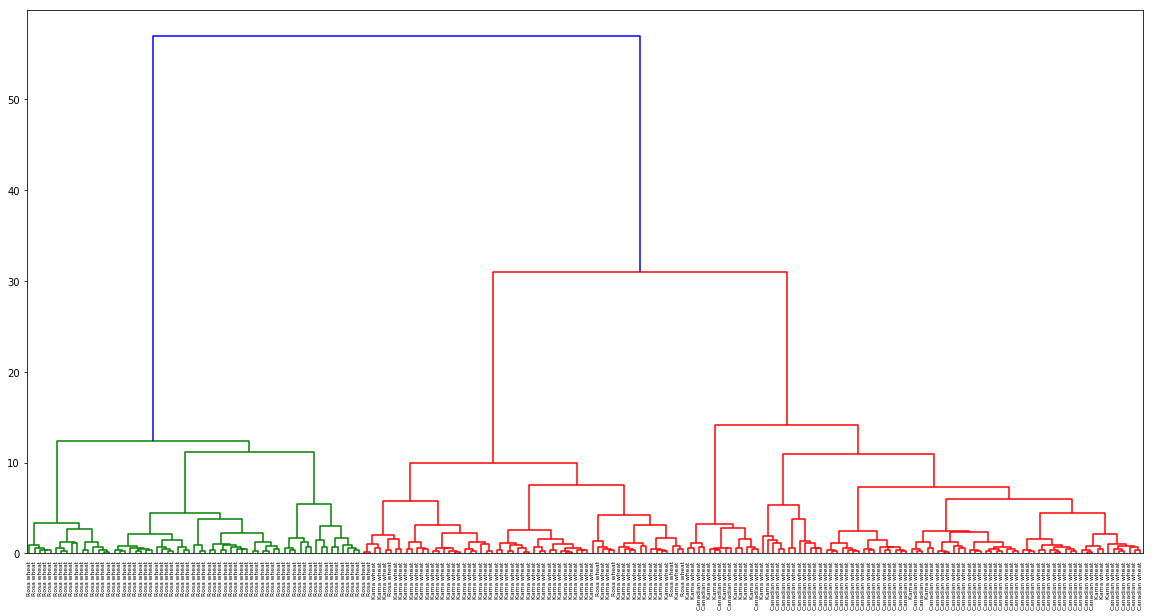

In [13]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

mergings = linkage(samples, method='ward')

plt.figure(figsize=(20,10))
dendrogram(mergings,
           labels=varieties,
           leaf_rotation=90,
           leaf_font_size=6,
)
plt.show()

<ul>
<li>Probar el método de clustering jerárquico con el método Ward y visualizar el resuldado con un Dendograma:</li>
</ul>

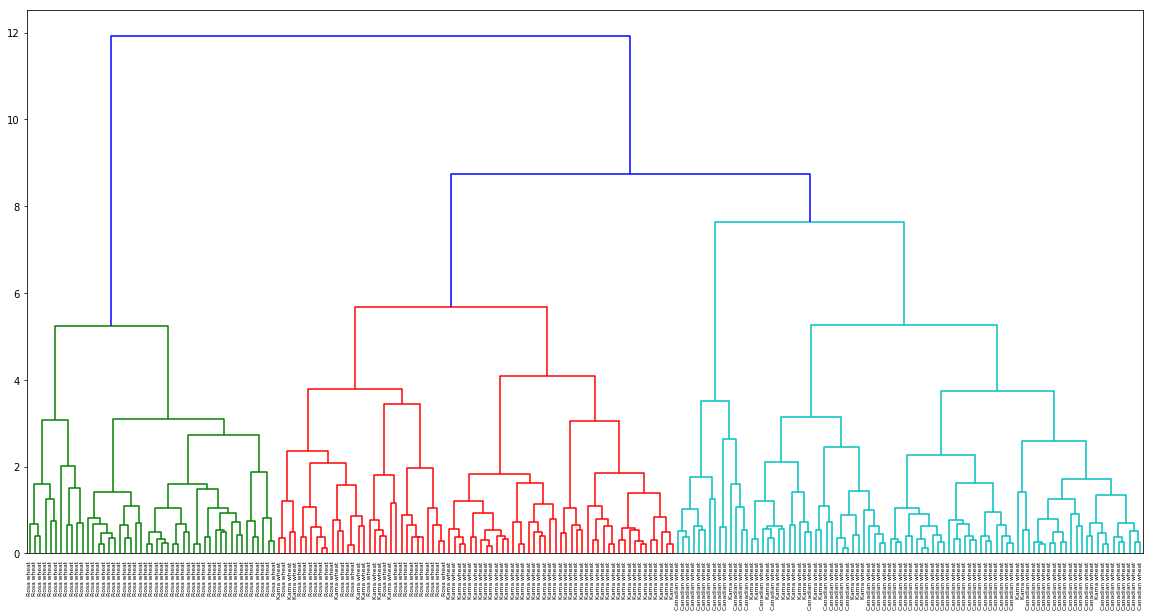

In [14]:
mergings2 = linkage(samples, method='complete')

plt.figure(figsize=(20,10))

dendrogram(mergings2,
           labels=varieties,
           leaf_rotation=90,
           leaf_font_size=6,
)
plt.show()

<h2>3. Ejercicio 3: Distance-based clustering vs. Density-based clustering</h2>

<ul>
<li> En este ejercicio queremos explorar los datos del dataset3.csv y hemos elegido utilizar el algoritmo K-Means.
<li> Cargar los datos:</li>
</ul>

In [15]:
#Cargar los datos:
import pandas as pd
dataframe3 = pd.read_csv('datasets/dataset3.csv')
#Encontrar el mejor número de cluser

<ul>
<li> Encontrar cuál es el mejor número de clusters:
</ul>

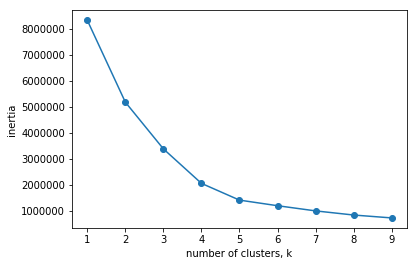

In [16]:
from sklearn.cluster import KMeans

#Prueba por k entre 1 y 10
num_k = range(1, 10)
inertias = []

for k in num_k:
    model = KMeans(n_clusters=k)
    model.fit(dataframe3)
    inertias.append(model.inertia_)

import matplotlib.pyplot as plt

# Plot ks vs inertias
plt.plot(num_k, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(num_k)
plt.show()

<ul>
<li> ¡El mejor número K parece ser 5! Clusterizemos con k=5 y visualizemos el resultado!
</ul>

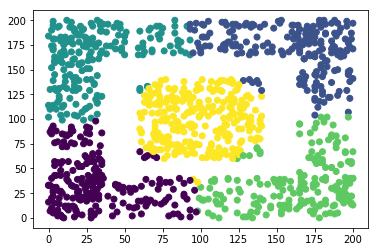

In [17]:
from sklearn.cluster import KMeans

modelKmeans = KMeans(n_clusters=5)
modelKmeans.fit(dataframe3.values)
labels = modelKmeans.predict(dataframe3.values)

plt.scatter(dataframe3.values[:,0], dataframe3.values[:,1], c=labels)
plt.show()

<ul>
<li> ¿Cuál es su opinión sobre el análisis?</li>
<li> Probemos con el algoritmo DBSCAN:
</ul>


In [18]:
def set_colors(labels, colors='rgbykcm'):
    colored_labels = []
    for label in labels:
        colored_labels.append(colors[label])
    return colored_labels

Counter({0: 111, 1: 94, 2: 93, -1: 2})


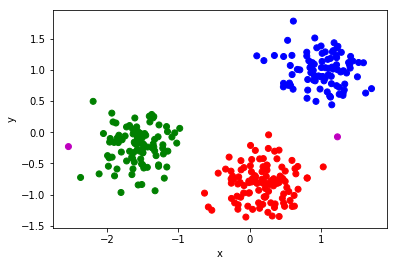

In [19]:
%matplotlib inline
from collections import Counter
import random

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
dataframe3 = pd.read_csv('datasets/dataset1.csv')

# Fit a DBSCAN estimator
estimator = DBSCAN(eps=0.4, min_samples=5)
#dataframe3.values = df_circ[["x", "y"]]
estimator.fit(dataframe3)

# Clusters are given in the labels_ attribute
labels = estimator.labels_
print(Counter(labels))

colors = set_colors(labels)
plt.scatter(dataframe3.values[:,0], dataframe3.values[:,1], c=colors)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

Counter({1: 800, 0: 300})


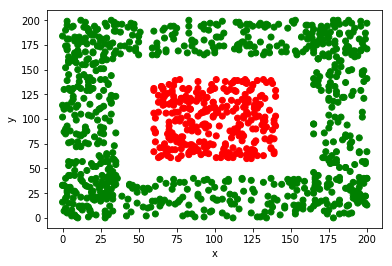

In [20]:
from collections import Counter
import random

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
dataframe3 = pd.read_csv('datasets/dataset3.csv')

# Fit a DBSCAN estimator
estimator = DBSCAN(eps=15, min_samples=5)
#dataframe3.values = df_circ[["x", "y"]]
estimator.fit(dataframe3)

# Clusters are given in the labels_ attribute
labels = estimator.labels_
print(Counter(labels))

colors = set_colors(labels)
plt.scatter(dataframe3.values[:,0], dataframe3.values[:,1], c=colors)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

<div style="border: 1px solid #000000; padding: 5px;">
<b>Preguntas:</b>
<ol>
<li> ¿De qué sirven los parametros epsilon y min_sample en DBSCAN?</li> 
</ol>
<p>R: Epsilon es la distancia máxima entre dos muestras o datos para que se consideren dentro de un mismo "vecindario".<br> 
    min_sample es la cantidad de muestras o datos (peso total) en un "vecindario" para que un punto sea considerado un  punto central, incluyendo al punto en sí. </p>
</div>

<h2>4. Ejercicio 4: ¿Cómo agrupar datos no estructurados multi-dimensionales?</h2>

<p>En el último ejercicio, vamos a explorar el agrupamiento de datos textuales con el algoritmo de Ward.
En general, los algoritmos K-Means, Ward o DBSCAN son limitados para agrupar datos textuales, y es preferible utilizar otro protocolo no supervisado como Latent Dirichlet Allocation (LDA). Sin embargo este ejercicio nos servirá en particular para empezar a utilizar la librería NLTK y revisar algunos preprocesamientos sobre datos textuales.</p>

<ul>
<li>Tenemos a nuestra disposición un dataset con 58 discursos políticos de los presidentes de Estados-Unidos. Cada uno corresponde al primer discurso que hace el presidente cuando entre en la Casa Blanca. Cargar el dataset 'speeches.csv':</li>
</ul>

In [21]:
import pandas as pd
import re
import nltk

#Cargar el dataset de speeches
df_speeches = pd.read_csv('datasets/speeches.csv')

<ul>
<li>SciKit-Learn viene con un API por defecto para transformar un dataset de textos brutos en una matrice donde cada texto es una representación vectorial del peso TFIDF de cada palabra.
</ul>

<img src="images/tfidf.png" alt="tfidf"></img>

<ul>
<li>Transformar el dataset de textos en un matrice de pesos TFIDF:</li>
</ul>

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(df_speeches.values[:,4])

<ul>
<li>Calcular la distancia entre cada documento:</li>
</ul>

In [23]:
from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(tfidf_matrix)

<ul>
<li>Agrupar los documentos con el algoritmo de Ward y la distancia entre documentos, y visualizar el resultado con un dendograma:</li>
</ul>

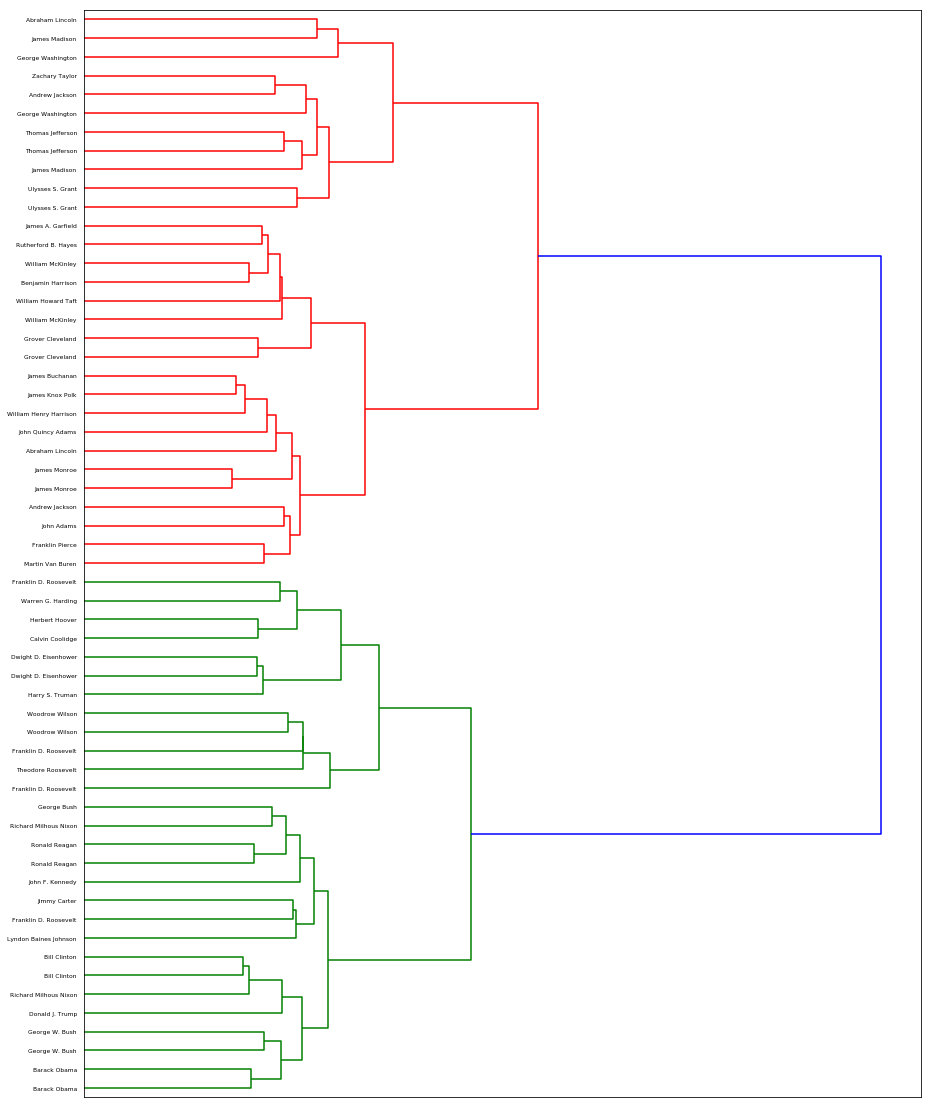

In [24]:
from scipy.cluster.hierarchy import ward, dendrogram

linkage_matrix = ward(dist) #define the linkage_matrix using ward clustering pre-computed distances

fig, ax = plt.subplots(figsize=(15, 20)) # set size
ax = dendrogram(linkage_matrix, orientation="right", labels=df_speeches.values[:,1]);

plt.tick_params(\
    axis= 'x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off')

#plt.tight_layout() #show plot with tight layout

#uncomment below to save figure
plt.show()

<ul>
<li>Hacer lo mismo pero con un preprocesamiento de <i>Stemming</i> y <i>n-gram</i> antes:
</ul>

In [25]:
# load nltk's SnowballStemmer as variabled 'stemmer'
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

# load nltk's English stopwords as variable called 'stopwords'
stopwords = nltk.corpus.stopwords.words('english')

# here I define a tokenizer and stemmer which returns the set of stems in the text that it is passed
def tokenize_and_stem(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems


def tokenize_only(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    return filtered_tokens

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=200000,
                                 min_df=0.2, stop_words='english',
                                 use_idf=True, tokenizer=tokenize_and_stem, ngram_range=(1,3))

tfidf_matrix2 = tfidf_vectorizer.fit_transform(df_speeches.values[:,4])

from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(tfidf_matrix2)

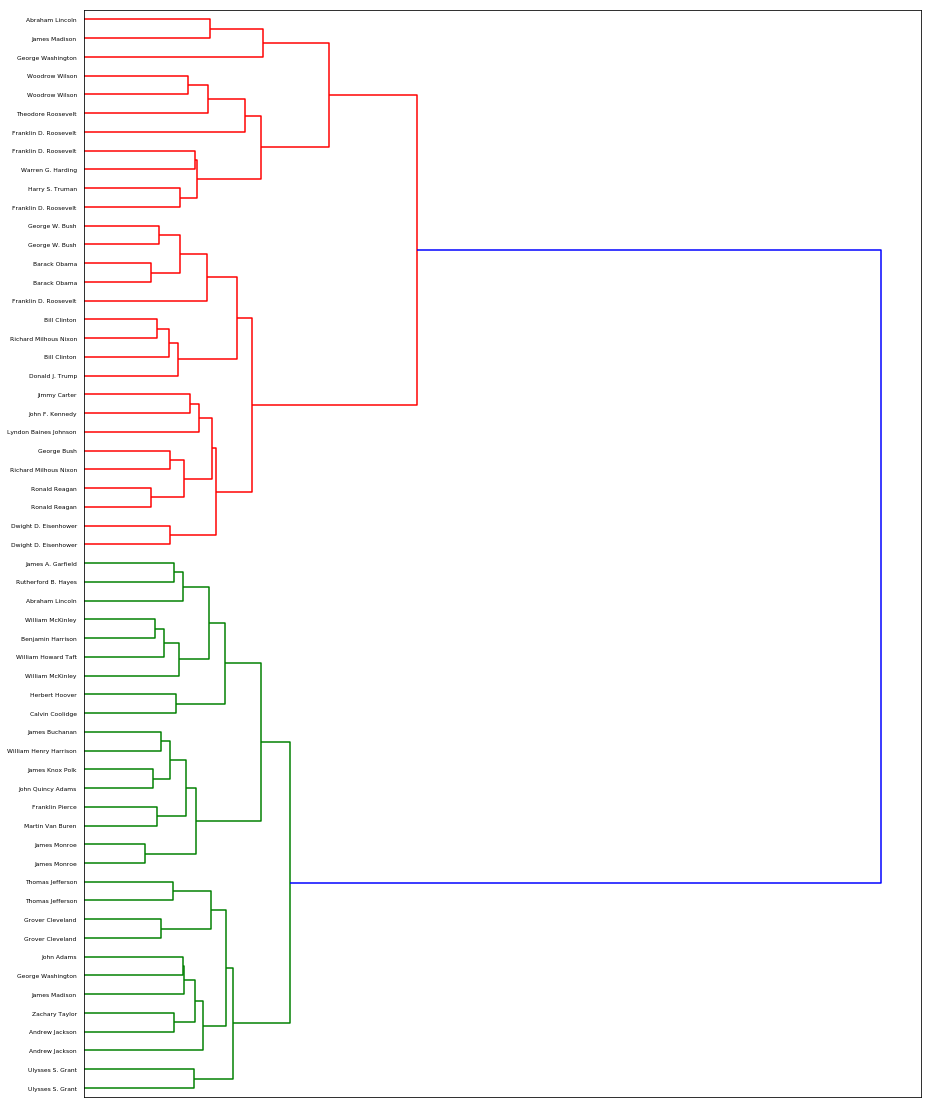

In [27]:
from scipy.cluster.hierarchy import ward, dendrogram

linkage_matrix = ward(dist) #define the linkage_matrix using ward clustering pre-computed distances

fig, ax = plt.subplots(figsize=(15, 20)) # set size
ax = dendrogram(linkage_matrix, orientation="right", labels=df_speeches.values[:,1]);

plt.tick_params(\
    axis= 'x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off')

#plt.tight_layout() #show plot with tight layout

#uncomment below to save figure
plt.show()